In [1]:
import warnings
warnings.filterwarnings("ignore")

import sys
sys.path.append("../../")

from experiment import Exp

from dataloaders import data_set,data_dict
import torch
import yaml
import os

# 参数设置

# 训练参数 
除了路径 其他不要变

In [2]:
class dotdict(dict):
    """dot.notation access to dictionary attributes"""
    __getattr__ = dict.get
    __setattr__ = dict.__setitem__
    __delattr__ = dict.__delitem__

args = dotdict()   
# TODO change the path as relative path
args.to_save_path     = r"E:\TECO_Works\Conference\ISWC2022\Run_logs"              
args.freq_save_path   = r"E:\TECO_Works\Conference\ISWC2022\Freq_data"
args.window_save_path = r"E:\TECO_Works\Conference\ISWC2022\Sliding_window"
args.root_path        = r"E:\datasets"


args.drop_transition  = False
args.datanorm_type    = "standardization" # None ,"standardization", "minmax"


args.batch_size       = 128                                                     
args.shuffle          = True
args.drop_last        = False
args.train_vali_quote = 0.90                                           


# training setting 
args.train_epochs            = 2

args.learning_rate           = 0.001  
args.learning_rate_patience  = 5
args.learning_rate_factor    = 0.1


args.early_stop_patience     = 15

args.use_gpu                 = True if torch.cuda.is_available() else False
args.gpu                     = 0
args.use_multi_gpu           = False

args.optimizer               = "Adam"
args.criterion               = "CrossEntropy"

## 数据参数



In [3]:
args.seed                             = 1


args.data_name                        =  "hapt"

args.wavelet_filtering                = True
args.wavelet_filtering_regularization = True
args.wavelet_filtering_finetuning     = True
args.wavelet_filtering_finetuning_percent = 0.2

args.regulatization_tradeoff          = 0.0001
args.number_wavelet_filtering         = 10


args.difference       = False 
args.filtering        =  False
args.magnitude        =  False
args.weighted_sampler = False




args.pos_select       = None
args.sensor_select    = None


args.representation_type = "time"
args.exp_mode            = "LOCV"

config_file = open('../../configs/data.yaml', mode='r')
data_config = yaml.load(config_file, Loader=yaml.FullLoader)
config = data_config[args.data_name]

args.root_path       = os.path.join(args.root_path,config["filename"])
args.sampling_freq   = config["sampling_freq"]
args.num_classes     =  config["num_classes"]
window_seconds       = config["window_seconds"]
args.windowsize      =   int(window_seconds * args.sampling_freq) 
args.input_length    =  args.windowsize
# input information
args.c_in            = config["num_channels"]

if args.wavelet_filtering :
    
    if args.windowsize%2==1:
        N_ds = int(torch.log2(torch.tensor(args.windowsize-1)).floor()) - 2
    else:
        N_ds = int(torch.log2(torch.tensor(args.windowsize)).floor()) - 2

    args.f_in            =  args.number_wavelet_filtering*N_ds+1
else:
    args.f_in            =  1



## 模型参数

In [4]:
args.filter_scaling_factor = 0.25
args.model_type              = "deepconvlstm"

# 实验

In [5]:
exp = Exp(args)

Use GPU: cuda:0
Wavelet Filtering Regularization
Build the DeepConvLSTM model!
Done!
Parameter : 738559
Set the seed as :  1


 ----------------------- load all the data -------------------
-----------------------Sliding file are generated -----------------------
-----------------------Sliding file are generated -----------------------
================ LOCV Mode ====================
================ 30 CV ======================
================ the 0 th CV Experiment ================ 
Leave one Out Experiment : The 1 Part as the test
[-] Target sampling weights:  [0.0006689  0.00068213 0.00073746 0.00061275 0.00056243 0.00056754
 0.00746269 0.01041667 0.00641026 0.00719424 0.00534759 0.00724638]
Train data number :  10339
The number of classes is :  12
The input_length  is :  128
The channel_in is :  6
Validation data number :  1149
Test data number :  6632
================Skip the 0 CV Experiment================
================Skip the 0 CV Experiment Fine Tuning================
================ the 1 th CV Experiment ================ 
Leave one Out Experiment : The 2 Part as the test
[-] Target sampling wei

[-] Target sampling weights:  [0.00064558 0.00067522 0.00072886 0.00063532 0.00057604 0.00058824
 0.00775194 0.01111111 0.00649351 0.00757576 0.00546448 0.00746269]
Train data number :  10234
The number of classes is :  12
The input_length  is :  128
The channel_in is :  6
Validation data number :  1138
Test data number :  7257
================ Build the model ================ 
Wavelet Filtering Regularization
Build the DeepConvLSTM model!
Epoch: 1 cost time: 17.434975385665894
VALI: Epoch: 1, Steps: 80 | Train Loss: 0.8086859  Vali Loss: 0.3391559 Vali Accuracy: 0.8857645  Vali weighted F1: 0.8768537  Vali macro F1 0.6180192 
Validation loss decreased (inf --> 0.339156).  Saving model ...
Epoch: 2 cost time: 17.41798758506775
VALI: Epoch: 2, Steps: 80 | Train Loss: 0.2824519  Vali Loss: 0.2337091 Vali Accuracy: 0.9156415  Vali weighted F1: 0.9125909  Vali macro F1 0.6896216 
new best score!!!!
Validation loss decreased (0.339156 --> 0.233709).  Saving model ...
new best score!!!!
Load

Fine Tuning Epoch: 1 cost time: 15.977958917617798
Fine Tuning VALI: Epoch: 1, Steps: 80 | Train Loss: 0.2262909  Vali Loss: 0.2113076 Vali Accuracy: 0.9196113  Vali weighted F1: 0.9176973  Vali macro F1 0.7711535 
Validation loss decreased (inf --> 0.211308).  Saving model ...
Fine Tuning Epoch: 2 cost time: 16.344890356063843
Fine Tuning VALI: Epoch: 2, Steps: 80 | Train Loss: 0.1971175  Vali Loss: 0.1952101 Vali Accuracy: 0.9293286  Vali weighted F1: 0.9283490  Vali macro F1 0.8022107 
new best score!!!!
Validation loss decreased (0.211308 --> 0.195210).  Saving model ...
new best score!!!!
Loading the best finetuned validation model!
Fine Tuning Final Test Performance : Test Accuracy: 0.9200581  Test weighted F1: 0.9217158  Test macro F1 0.7748489 
================ the 9 th CV Experiment ================ 
Leave one Out Experiment : The 10 Part as the test
[-] Target sampling weights:  [0.00064851 0.00068587 0.00074405 0.00062228 0.00057471 0.00058072
 0.0078125  0.01041667 0.006802

Test data number :  2179
================ Build the model ================ 
Wavelet Filtering Regularization
Build the DeepConvLSTM model!
Epoch: 1 cost time: 18.22328805923462
VALI: Epoch: 1, Steps: 87 | Train Loss: 0.8242688  Vali Loss: 0.3273567 Vali Accuracy: 0.8921330  Vali weighted F1: 0.8858528  Vali macro F1 0.6700759 
Validation loss decreased (inf --> 0.327357).  Saving model ...
Epoch: 2 cost time: 18.274502277374268
VALI: Epoch: 2, Steps: 87 | Train Loss: 0.2818679  Vali Loss: 0.2341672 Vali Accuracy: 0.9099757  Vali weighted F1: 0.9067552  Vali macro F1 0.7366161 
new best score!!!!
Validation loss decreased (0.327357 --> 0.234167).  Saving model ...
new best score!!!!
Loading the best validation model!
Final Test Performance : Test Accuracy: 0.9160165  Test weighted F1: 0.9129406  Test macro F1 0.7764528 
Wavelet Filtering Regularization
Build the DeepConvLSTM model!
Wavelet Filtering Regularization
Build the DeepConvLSTM model!
------------Fine Tuning  :  41   will be pr

Fine Tuning Epoch: 1 cost time: 16.908801794052124
Fine Tuning VALI: Epoch: 1, Steps: 87 | Train Loss: 0.1975907  Vali Loss: 0.1795593 Vali Accuracy: 0.9235772  Vali weighted F1: 0.9210129  Vali macro F1 0.7653376 
Validation loss decreased (inf --> 0.179559).  Saving model ...
Fine Tuning Epoch: 2 cost time: 16.916800498962402
Fine Tuning VALI: Epoch: 2, Steps: 87 | Train Loss: 0.1639944  Vali Loss: 0.1567222 Vali Accuracy: 0.9341463  Vali weighted F1: 0.9317644  Vali macro F1 0.7819443 
new best score!!!!
Validation loss decreased (0.179559 --> 0.156722).  Saving model ...
new best score!!!!
Loading the best finetuned validation model!
Fine Tuning Final Test Performance : Test Accuracy: 0.8091767  Test weighted F1: 0.8072642  Test macro F1 0.7230006 
================ the 16 th CV Experiment ================ 
Leave one Out Experiment : The 17 Part as the test
[-] Target sampling weights:  [0.0006068  0.00062775 0.00068634 0.00058617 0.00053677 0.00053447
 0.0070922  0.00970874 0.00591

Test data number :  2373
================ Build the model ================ 
Wavelet Filtering Regularization
Build the DeepConvLSTM model!
Epoch: 1 cost time: 18.022056102752686
VALI: Epoch: 1, Steps: 87 | Train Loss: 0.8427869  Vali Loss: 0.3428414 Vali Accuracy: 0.8803906  Vali weighted F1: 0.8729427  Vali macro F1 0.6186016 
Validation loss decreased (inf --> 0.342841).  Saving model ...
Epoch: 2 cost time: 17.826011180877686
VALI: Epoch: 2, Steps: 87 | Train Loss: 0.2761787  Vali Loss: 0.2225499 Vali Accuracy: 0.9235151  Vali weighted F1: 0.9209945  Vali macro F1 0.7729826 
new best score!!!!
Validation loss decreased (0.342841 --> 0.222550).  Saving model ...
new best score!!!!
Loading the best validation model!
Final Test Performance : Test Accuracy: 0.9490097  Test weighted F1: 0.9500679  Test macro F1 0.8232683 
Wavelet Filtering Regularization
Build the DeepConvLSTM model!
Wavelet Filtering Regularization
Build the DeepConvLSTM model!
------------Fine Tuning  :  41   will be p

Fine Tuning Epoch: 1 cost time: 17.046837329864502
Fine Tuning VALI: Epoch: 1, Steps: 87 | Train Loss: 0.2377955  Vali Loss: 0.2137099 Vali Accuracy: 0.9300244  Vali weighted F1: 0.9272479  Vali macro F1 0.7758268 
Validation loss decreased (inf --> 0.213710).  Saving model ...
Fine Tuning Epoch: 2 cost time: 17.102842807769775
Fine Tuning VALI: Epoch: 2, Steps: 87 | Train Loss: 0.1966506  Vali Loss: 0.1836754 Vali Accuracy: 0.9389748  Vali weighted F1: 0.9362921  Vali macro F1 0.8029197 
new best score!!!!
Validation loss decreased (0.213710 --> 0.183675).  Saving model ...
new best score!!!!
Loading the best finetuned validation model!
Fine Tuning Final Test Performance : Test Accuracy: 0.8835559  Test weighted F1: 0.8771724  Test macro F1 0.7315297 
================ the 23 th CV Experiment ================ 
Leave one Out Experiment : The 24 Part as the test
[-] Target sampling weights:  [0.00060643 0.00062893 0.00068966 0.00058514 0.00053022 0.00054466
 0.00699301 0.00884956 0.00621

Test data number :  2437
================ Build the model ================ 
Wavelet Filtering Regularization
Build the DeepConvLSTM model!
Epoch: 1 cost time: 17.95503854751587
VALI: Epoch: 1, Steps: 87 | Train Loss: 0.8943894  Vali Loss: 0.3455891 Vali Accuracy: 0.8794788  Vali weighted F1: 0.8720175  Vali macro F1 0.6358893 
Validation loss decreased (inf --> 0.345589).  Saving model ...
Epoch: 2 cost time: 17.864022970199585
VALI: Epoch: 2, Steps: 87 | Train Loss: 0.3059167  Vali Loss: 0.2555255 Vali Accuracy: 0.8998371  Vali weighted F1: 0.8977120  Vali macro F1 0.7035843 
new best score!!!!
Validation loss decreased (0.345589 --> 0.255526).  Saving model ...
new best score!!!!
Loading the best validation model!
Final Test Performance : Test Accuracy: 0.9626590  Test weighted F1: 0.9602950  Test macro F1 0.7821381 
Wavelet Filtering Regularization
Build the DeepConvLSTM model!
Wavelet Filtering Regularization
Build the DeepConvLSTM model!
------------Fine Tuning  :  41   will be pr

KeyboardInterrupt: 

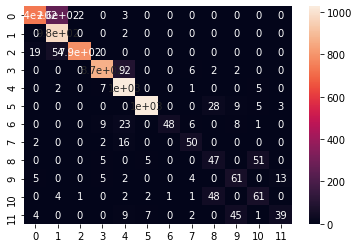

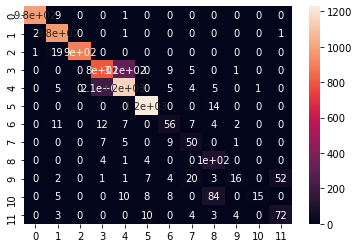

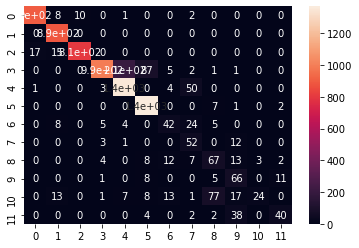

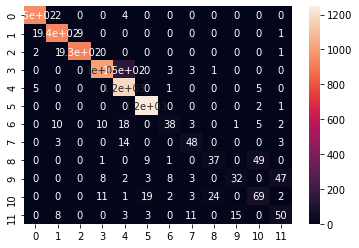

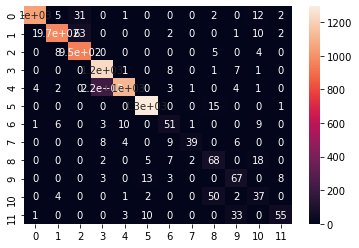

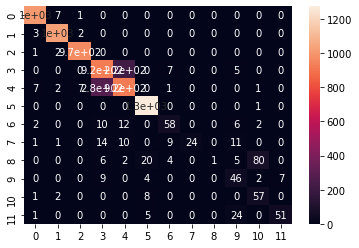

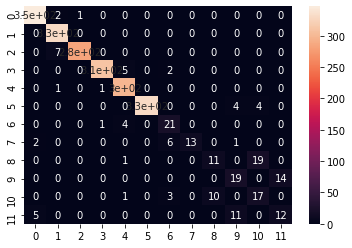

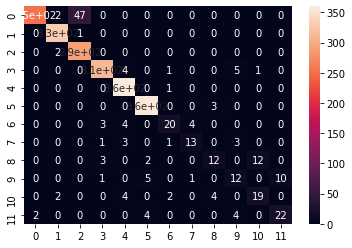

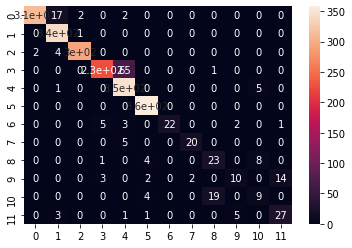

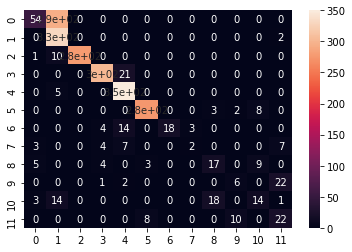

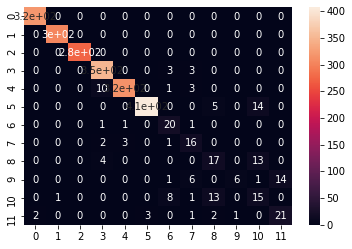

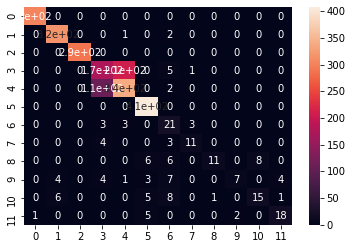

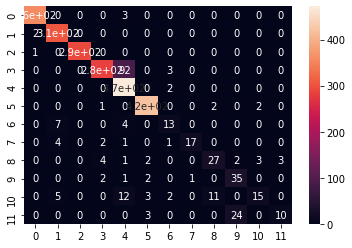

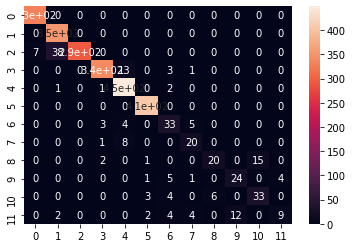

Error in callback <function flush_figures at 0x000001C3511F7CA0> (for post_execute):


KeyboardInterrupt: 

In [6]:
exp.train()